In [1]:
# Read the February 2012 power data from the data folder.
import pandas as pd
df = pd.read_csv("../data/2012-11-power-survey-london.csv")

In [2]:
df.head()

,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,M_count,N_count,O_count,P_count,Q_count,U_count,count,sigma,mean,std
0,2012-11-01 00:00:00,44.114,3.763,23.737,54.830,247.044000,93.629,26.592,69.337,5.030,...,96,123,85,87,703,38,4400,816.756000,0.185626,0.246391
1,2012-11-01 00:30:00,35.766,3.506,22.362,49.337,273.139000,80.841,24.748,58.632,5.067,...,96,123,86,87,705,38,4401,860.233001,0.195463,0.396347
2,2012-11-01 01:00:00,30.507,2.746,16.128,42.145,243.375000,70.748,21.182,53.795,3.900,...,96,123,86,87,705,38,4401,755.924000,0.171762,0.359319
3,2012-11-01 01:30:00,29.485,2.928,15.075,43.120,217.994999,64.444,19.340,45.153,3.955,...,96,123,86,87,705,38,4401,682.887999,0.155167,0.317513
4,2012-11-01 02:00:00,27.090,2.350,14.974,37.143,195.699000,60.609,17.298,42.826,3.608,...,96,123,86,87,705,38,4396,616.894000,0.140331,0.273899


In [3]:
from datetime import datetime
# Create two functions that will allow us to create data based on the data in each row.

def dayCalc(row):
    return pd.to_datetime(row['datetime']).day

def tstampCalc(row):
    return f"{pd.to_datetime(row['datetime']).hour}:{pd.to_datetime(row['datetime']).minute:02}"
    
# Create new columns for the day of the month and also a column for the time stamp (e.g. 20:30).

df['day'] = df.apply(dayCalc, axis = 1)
df['tstamp'] = df.apply(tstampCalc, axis = 1)

In [4]:
# Create a dataframe representing energy consumption for November 24th 2012, the day
# of the England vs. South Africa Rugby game.

df_Eng_Sth_Afr_11_24 = df.loc[df['day']==11]
df_Eng_Sth_Afr_11_24 = df_Eng_Sth_Afr_11_24.set_index(df_Eng_Sth_Afr_11_24["tstamp"])
df_Eng_Sth_Afr_11_24.head(5)

,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,O_count,P_count,Q_count,U_count,count,sigma,mean,std,day,tstamp
tstamp,,,,,,,,,,,,,,,,,,,,,
0:00,2012-11-11 00:00:00,43.996,4.201,25.327,65.158,273.161000,104.173,31.608,83.466,7.508,...,86,87,705,38,4410,921.292000,0.208910,0.255842,11,0:00
0:30,2012-11-11 00:30:00,36.484,3.803,22.538,58.467,301.821999,93.798,27.840,71.394,6.436,...,86,87,703,38,4410,961.101999,0.217937,0.399713,11,0:30
1:00,2012-11-11 01:00:00,31.379,2.914,19.423,56.704,270.144000,87.348,25.892,65.443,5.219,...,86,87,703,38,4409,869.741001,0.197265,0.379211,11,1:00
1:30,2012-11-11 01:30:00,29.560,2.471,17.789,55.097,239.462000,84.041,21.006,55.363,5.862,...,86,87,703,38,4409,788.247001,0.178781,0.347305,11,1:30
2:00,2012-11-11 02:00:00,25.727,2.258,14.864,46.835,221.305999,72.777,21.881,48.425,3.784,...,86,87,703,38,4409,700.946999,0.158981,0.300169,11,2:00


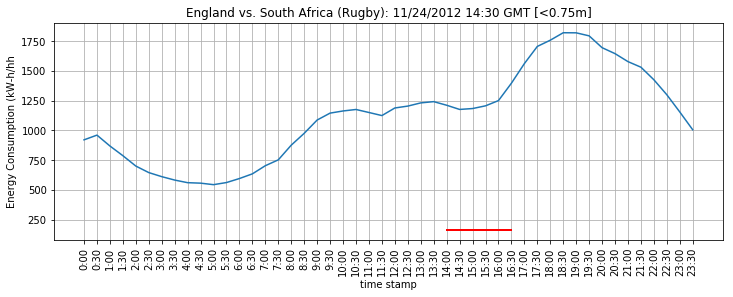

In [5]:
# Plot the day's energy consumption.

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,4))
plt.plot(df_Eng_Sth_Afr_11_24["tstamp"],df_Eng_Sth_Afr_11_24["sigma"])
plt.xticks(rotation='vertical')
plt.title("England vs. South Africa (Rugby): 11/24/2012 14:30 GMT [<0.75m]")
plt.xlabel("time stamp")
plt.ylabel("Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['14:00', '16:30'], [160, 160], color='r', linestyle='-', linewidth=2)
plt.show()

In [6]:
# Create date series for each Acorn group.

# Acorn1 = A, B, C
# Acorn2 = D, E
# Acorn3 = F, G, H, I, J
# Acorn4 = K, L, M, N
# Acorn5 = O, P, Q

Acorn1  = df_Eng_Sth_Afr_11_24["A_sigma"] + df_Eng_Sth_Afr_11_24["B_sigma"] + df_Eng_Sth_Afr_11_24["C_sigma"]
Acorn2  = df_Eng_Sth_Afr_11_24["D_sigma"] + df_Eng_Sth_Afr_11_24["E_sigma"]
Acorn3  = df_Eng_Sth_Afr_11_24["F_sigma"] + df_Eng_Sth_Afr_11_24["G_sigma"] + df_Eng_Sth_Afr_11_24["H_sigma"] \
                                           + df_Eng_Sth_Afr_11_24["I_sigma"] + df_Eng_Sth_Afr_11_24["J_sigma"]
Acorn4  = df_Eng_Sth_Afr_11_24["K_sigma"] + df_Eng_Sth_Afr_11_24["L_sigma"] + df_Eng_Sth_Afr_11_24["M_sigma"] \
                                           + df_Eng_Sth_Afr_11_24["N_sigma"]
Acorn5  = df_Eng_Sth_Afr_11_24["O_sigma"] + df_Eng_Sth_Afr_11_24["P_sigma"] + df_Eng_Sth_Afr_11_24["Q_sigma"]

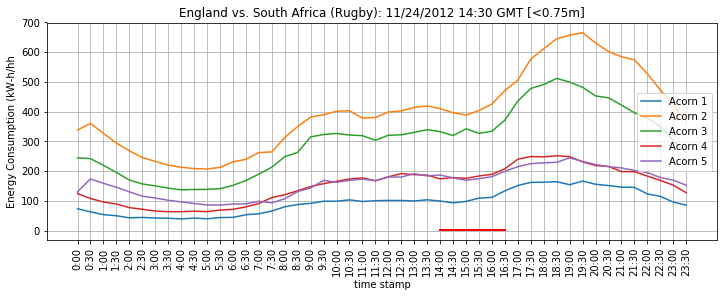

In [7]:
# Plot the day's energy consumption for each Acorn group using a multiline plot.

plt.figure(figsize=(12,4))
hnd1, = plt.plot(df_Eng_Sth_Afr_11_24["tstamp"],Acorn1, label = 'Acorn 1')
hnd2, = plt.plot(df_Eng_Sth_Afr_11_24["tstamp"],Acorn2, label = 'Acorn 2')
hnd3, = plt.plot(df_Eng_Sth_Afr_11_24["tstamp"],Acorn3, label = 'Acorn 3')
hnd4, = plt.plot(df_Eng_Sth_Afr_11_24["tstamp"],Acorn4, label = 'Acorn 4')
hnd5, = plt.plot(df_Eng_Sth_Afr_11_24["tstamp"],Acorn5, label = 'Acorn 5')
plt.xticks(rotation='vertical')
plt.title("England vs. South Africa (Rugby): 11/24/2012 14:30 GMT [<0.75m]")
plt.xlabel("time stamp")
plt.ylabel("Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['14:00', '16:30'], [0.5, 0.5], color='r', linestyle='-', linewidth=2)
plt.legend(handles=[hnd1, hnd2, hnd3, hnd4, hnd5], loc="right")
plt.show()

In [8]:
# Normalize the energy consumption for each Acorn group using the timestamp 19:30 as the reference value.
# This is to compare trends amongst the groups.

Acorn1 = Acorn1 / Acorn1['19:30']
Acorn2 = Acorn2 / Acorn2['19:30']
Acorn3 = Acorn3 / Acorn3['19:30']
Acorn4 = Acorn4 / Acorn4['19:30']
Acorn5 = Acorn5 / Acorn5['19:30']

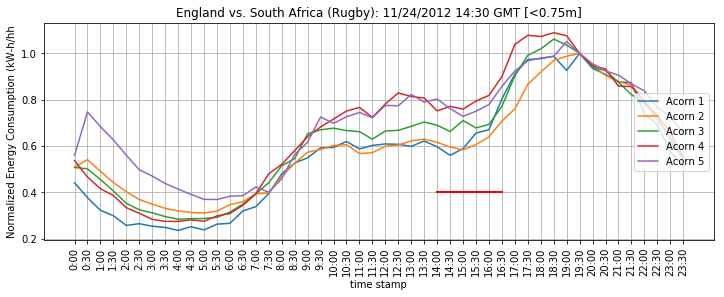

In [9]:
# Plot the day's normalized energy consumption for each Acorn group using a multiline plot.

plt.figure(figsize=(12,4))
hnd1, = plt.plot(df_Eng_Sth_Afr_11_24["tstamp"],Acorn1, label = 'Acorn 1')
hnd2, = plt.plot(df_Eng_Sth_Afr_11_24["tstamp"],Acorn2, label = 'Acorn 2')
hnd3, = plt.plot(df_Eng_Sth_Afr_11_24["tstamp"],Acorn3, label = 'Acorn 3')
hnd4, = plt.plot(df_Eng_Sth_Afr_11_24["tstamp"],Acorn4, label = 'Acorn 4')
hnd5, = plt.plot(df_Eng_Sth_Afr_11_24["tstamp"],Acorn5, label = 'Acorn 5')
plt.xticks(rotation='vertical')
plt.title("England vs. South Africa (Rugby): 11/24/2012 14:30 GMT [<0.75m]")
plt.xlabel("time stamp")
plt.ylabel("Normalized Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['14:00', '16:30'], [0.4, 0.4], color='r', linestyle='-', linewidth=2)
plt.legend(handles=[hnd1, hnd2, hnd3, hnd4, hnd5], loc="right")
plt.show()